# Problem Set 2: Two-State Ionic Channels in Python #

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

## Problem 1: Probability of transition ##

In [2]:
ts = 0.1
alpha = 1
beta = 2

# compute stochastic matrix
A = np.array([[1 - (ts*alpha), (ts*beta)],
             [(ts*alpha), 1 - (ts*beta)]])

print("Stochastic matrix:\n", A)

Stochastic matrix:
 [[0.9 0.2]
 [0.1 0.8]]


## Problem 2: Simulation of a single channel ##

In [3]:
ts = 0.1
A = np.array([[1 - (ts*alpha), (ts*beta)],
             [(ts*alpha), 1 - (ts*beta)]])
x = np.array([0,1]).T
T = 500

In [4]:
t = np.arange(0, T, ts)
X = np.zeros((2, int(T//ts)+1))

X[:, 0] = x
channel = [1]
for i in range(1, int(T//ts)+1):
    p = A @ X[:, i-1]
    u = np.random.rand()
    if u <= p[1]:
        channel.append(1)
        X[:, i] = np.array([0, 1])
    if u > p[1]:
        channel.append(0)
        X[:, i] = np.array([1, 0])

(0.0, 10.0)

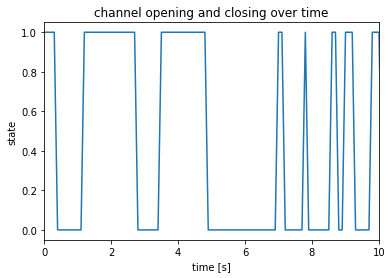

In [5]:
# plot simulation of single channel for t = 10s
plt.plot(t, channel)
plt.xlabel("time [s]")
plt.ylabel("state")
plt.title("channel opening and closing over time")
plt.xlim(0, 10)

In [6]:
print("Mean open rate:", np.mean(channel)) # mean open rate

Mean open rate: 0.325


The channel is open at around $\frac{1}{3}$ of the time.

## Problem 3: Channel dwell times ##

In [7]:
ts = 0.1
A = np.array([[1 - (ts*alpha), (ts*beta)],
             [(ts*alpha), 1 - (ts*beta)]])
x = np.array([0,1]).T
T = 5000

In [8]:
t = np.arange(0, T, ts)
X = np.zeros((2, int(T//ts)+1))

X[:, 0] = x
channel = [1]
for i in range(1, int(T//ts)+1):
    p = A @ X[:, i-1]
    u = np.random.rand()
    if u <= p[1]:
        channel.append(1)
        X[:, i] = np.array([0, 1])
    if u > p[1]:
        channel.append(0)
        X[:, i] = np.array([1, 0])

In [9]:
previous_channel = 1
previous_t = 0

t_open = []
t_closed = []

for i in range(1, int(T//ts)+1):
    current_channel = channel[i]
    current_t = t[i]
    if current_channel != previous_channel:
        if previous_channel == 0:
            t_closed.append(current_t - previous_t)
        elif previous_channel == 1:
            t_open.append(current_t - previous_t)
        previous_channel = current_channel
        previous_t = current_t

Text(0.5, 1.0, 'closed dwell times')

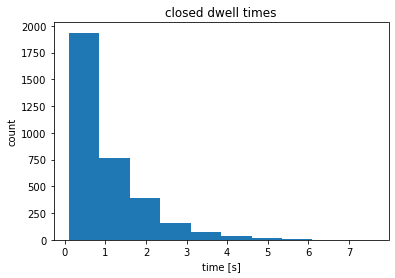

In [10]:
plt.hist(t_closed)
plt.xlabel("time [s]")
plt.ylabel("count")
plt.title("closed dwell times")

Text(0.5, 1.0, 'opened dwell times')

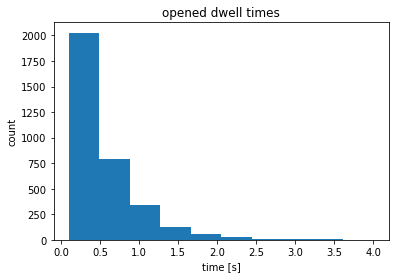

In [11]:
plt.hist(t_open)
plt.xlabel("time [s]")
plt.ylabel("count")
plt.title("opened dwell times")

In [12]:
print("Mean closed time:", np.mean(t_closed))
print("Mean opened time:", np.mean(t_open))

Mean closed time: 0.988174273858921
Mean opened time: 0.49294814814814836


My theoretical expectations would be that (1) there are many short closed and opened times with only a few very long times, (2) the mean closed time is twice as big as the mean opened times (because the channel is open at a rate of $\frac{1}{3}$. This fits with the simulation.

## Problem 4: Propagation of state probabilities ##

In [13]:
ts = 0.1
A = np.array([[1 - (ts*alpha), (ts*beta)],
             [(ts*alpha), 1 - (ts*beta)]])
x = np.array([0,1]).T
T = 500

In [14]:
t = np.arange(0, T, ts)
X = np.zeros((2, int(T//ts)+1))

X[:, 0] = x
channel = [1]
for i in range(1, int(T//ts)+1):
    X[:, i] = A @ X[:, i-1]
    u = np.random.rand()
    if u <= X[1, i]:
        channel.append(1)
    if u > X[1, i]:
        channel.append(0)

In [15]:
print("Asymptotc probabilitites:", X[:, -1])

Asymptotc probabilitites: [0.66666667 0.33333333]


The asymptotic probabilities agree with mean channel opening from problem 1.

In [16]:
v, w = np.linalg.eig(A) # obtain eigenvalues and -vectors
print("Normalized eigenvector with eigenvalue = 1:", w[:, 0] / sum(w[:, 0]))

Normalized eigenvector with eigenvalue = 1: [0.66666667 0.33333333]


The eigenvector with eigenvalue $\lambda = 1$ normalized to probabilities corresponds to the asymptotic probabilities.

Also the equilibrium value fits with the asymptoic probabilities:

$$ x_\infty = \frac{\alpha}{\alpha + \beta} = \frac{1}{1 + 2} = \frac{1}{3}$$

Time constant:

$$ \tau = \frac{1}{\alpha + \beta} = \frac{1}{1 + 2} = \frac{1}{3}$$

I don't know what to say about the time constant.